In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Load dataset
data = pd.read_csv("/content/cars.csv")

In [13]:
data.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai,2,4.0
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai,14,9.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1725 non-null   int64  
 1   year                     1725 non-null   int64  
 2   brand                    1725 non-null   object 
 3   full_model_name          1725 non-null   object 
 4   model_name               1725 non-null   object 
 5   price                    1725 non-null   float64
 6   distance_travelled(kms)  1725 non-null   float64
 7   fuel_type                1725 non-null   object 
 8   city                     1725 non-null   object 
 9   brand_rank               1725 non-null   int64  
 10  car_age                  1725 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 148.4+ KB


<Axes: >

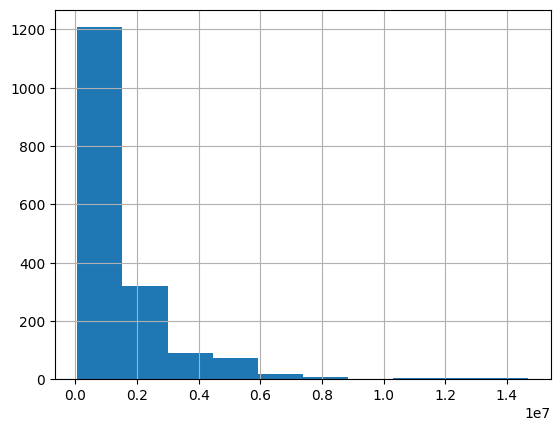

In [14]:
# Univariate Analysis
data.describe()
data.info()
data['price'].hist()

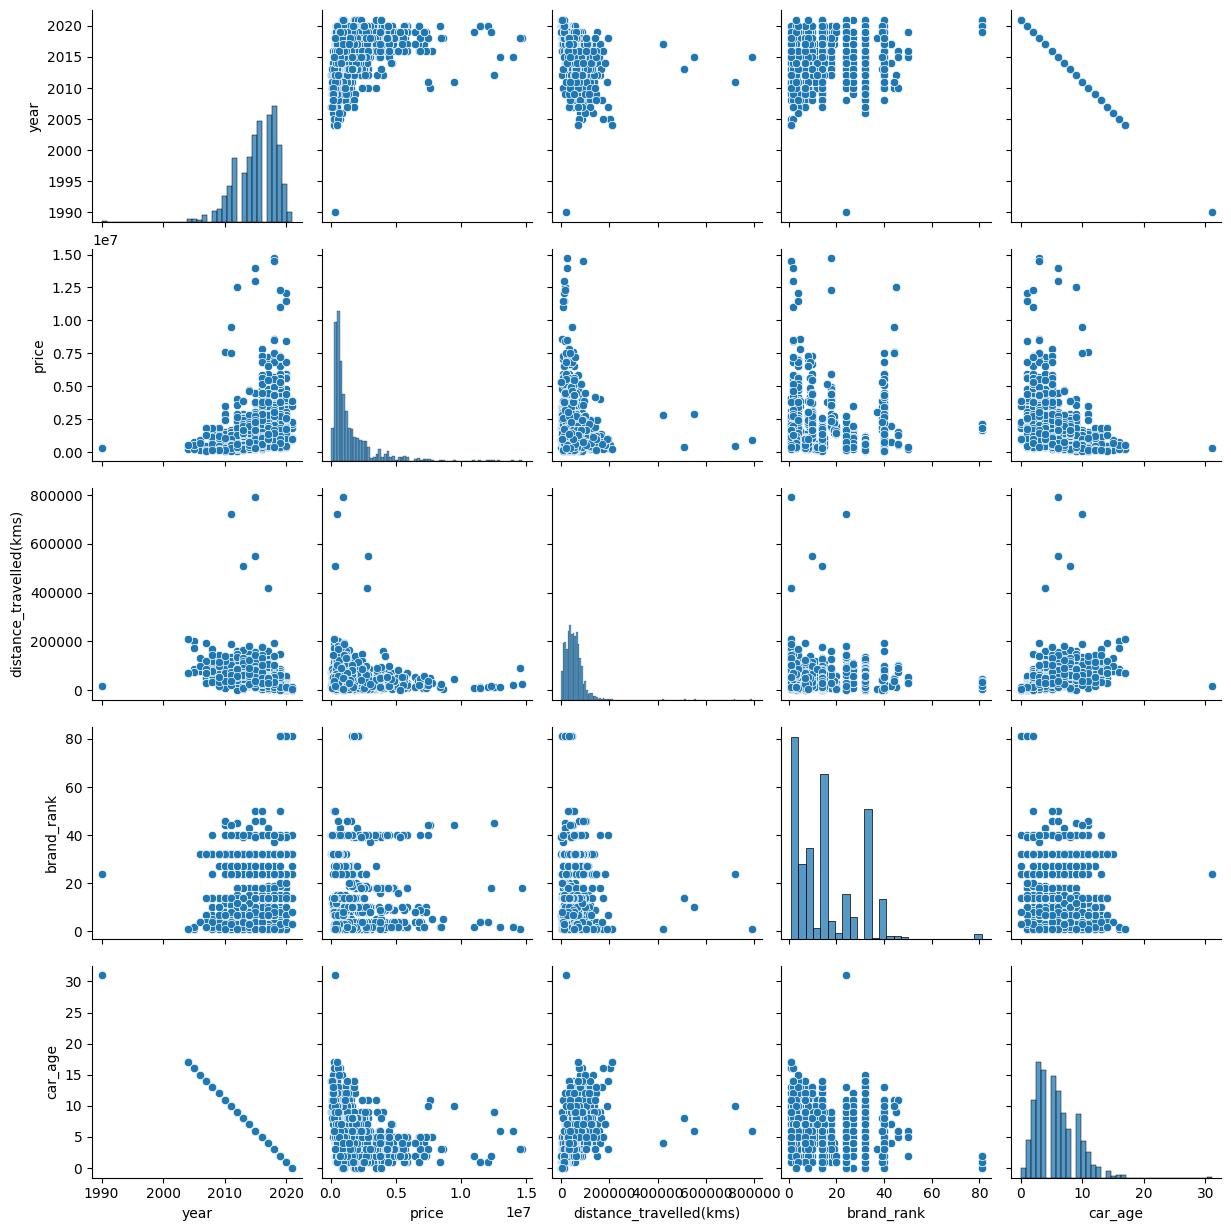

In [16]:
# Multivariate Analysis
sns.pairplot(data)
#corr_matrix = data.corr()
#sns.heatmap(corr_matrix, annot=True)

In [15]:
# Drop irrelevant columns
data = data.drop(['Id', 'brand','full_model_name', 'city'], axis=1)

In [17]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['model_name', 'fuel_type'])


In [18]:
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

In [20]:
# Random Forest Regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [21]:
# Model evaluation
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_y_pred))
lr_r2 = r2_score(y_test, lr_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)



In [22]:

# Feature importance
feature_importance = rf_model.feature_importances_
important_features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
important_features = important_features.sort_values('Importance', ascending=False)



In [23]:
# Print performance metrics and important features
print('Linear Regression RMSE:', lr_rmse)
print('Linear Regression R^2 Score:', lr_r2)
print('Random Forest Regression RMSE:', rf_rmse)
print('Random Forest Regression R^2 Score:', rf_r2)
print('Important Features:')
print(important_features)

Linear Regression RMSE: 1116400.7116737247
Linear Regression R^2 Score: 0.6287323832823284
Random Forest Regression RMSE: 1046407.6437250955
Random Forest Regression R^2 Score: 0.6738265046651706
Important Features:
                     Feature  Importance
2                 brand_rank    0.234148
3                    car_age    0.077852
0                       year    0.076018
1    distance_travelled(kms)    0.066855
83       model_name_Gallardo    0.066261
..                       ...         ...
74     model_name_Freelander    0.000000
76        model_name_G-Class    0.000000
86        model_name_Harrier    0.000000
137       model_name_Terrano    0.000000
102          model_name_MU-X    0.000000

[178 rows x 2 columns]
